<h1>NLP</h1>

In [2]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

from textblob import TextBlob

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

# Querying the cleaned property table
# Pfad zur CSV-Datei angeben
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # Versuche, die CSV-Datei einzulesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\AnninaBerweger\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [15]:
from textblob import TextBlob

# Ersetze Nicht-Wörter, führe eine untere Normalisierung durch und behandle fehlende Werte
df_filtered_property_location_clean['cleaned_description'] = df_filtered_property_location_clean['PropertyDescription'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)

# Funktion zur Berechnung der Sentiment-Werte
def calculate_sentiment(text):
    if text:  # Überprüfen, ob der Text nicht leer ist
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    else:
        return 0, 0  # Zurückgeben neutraler Werte, wenn kein Text vorhanden ist

# Anwenden der Sentiment-Analyse auf jede Beschreibung
df_filtered_property_location_clean[['polarity', 'subjectivity']] = df_filtered_property_location_clean['cleaned_description'].apply(
    lambda x: pd.Series(calculate_sentiment(x))
)

df_sentiment = df_filtered_property_location_clean[['PropertyDescription', 'polarity','subjectivity']]

# Anzeigen einiger Ergebnisse zur Überprüfung
print(df_sentiment[['PropertyDescription', 'polarity', 'subjectivity']].head(50))

df_sentiment.to_csv('NLP_Sentiment_PropertyDescription_Results.csv', index=False)



                                  PropertyDescription  polarity  subjectivity
0   La Residenza Delta si trova a Capolago, situat... -0.062500      0.312500
1   La Residenza Martina, progettata dall’Architet...  0.000000      0.000000
2   Affittasi 2 locali grazioso e luminoso in un q...  0.000000      0.500000
3   Siamo a Pazzallo, a circa 10 minuti dal centro...  0.000000      0.000000
4   A Bissone affittiamo appartamento arredato di ...  0.000000      0.000000
5   Sei alla ricerca di un ufficio / spazio commer...  0.000000      0.000000
6   Luminoso 3.5 locali ristrutturatoCaslano, a po...  0.000000      0.000000
7                                                 nan  0.000000      0.000000
8   Da subito affittiamo bilocali in ottima posizi...  0.000000      0.000000
9   Residenza 2 Grappoli - GudoAppartamento 32 al ...  0.000000      0.000000
10  Affittiamo nelle dirette vicinanze del lago e ...  0.000000      0.000000
11  Affittiamo recente appartamento di 3,5 locali ... -0.125000 

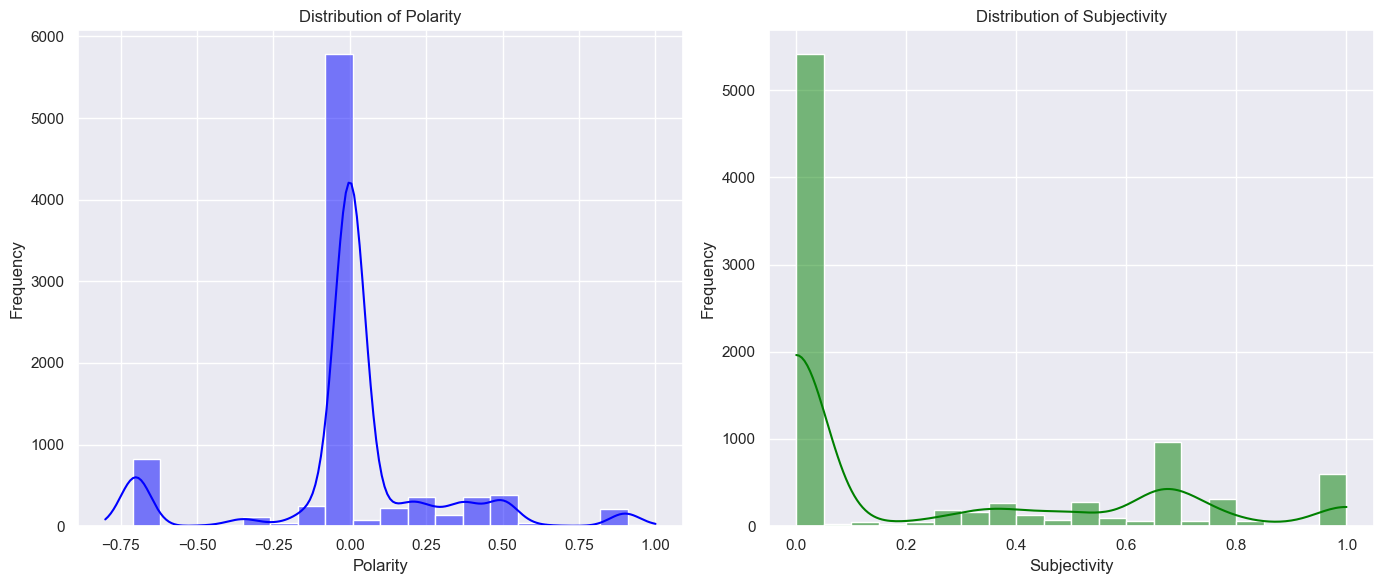

In [13]:
# Erstellen von Visualisierungen der Sentiment-Analyse
plt.figure(figsize=(14, 6))

# Subplot 1: Polarity
plt.subplot(1, 2, 1)
sns.histplot(df_sentiment_results['polarity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subplot 2: Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(df_sentiment_results['subjectivity'], bins=20, kde=True, color='green')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
